In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [62]:
exploration = [0.5, 1.0, 2.0, 3.0]
rw_mcts_nfe = np.array([66313, 57662, 47300, 40873])/1024
rw_mcts_vendi = [3.1294, 3.08552, 2.813165, 2.8292536]
rw_mcts_vendi2 = [13.1453, 13.0783, 12.9602, 11.2911787]
cg_mcts_nfe = np.array([53434, 55865, 58354, 56751])/1024
cg_mcts_vendi = [
2.850412607192993,
2.953402042388916,
2.9311110973358154,
3.159148693084717,
]
cg_mcts_vendi2 = [
12.725425720214844,
11.556779861450195,
12.187978744506836,
13.936070442199707,
]

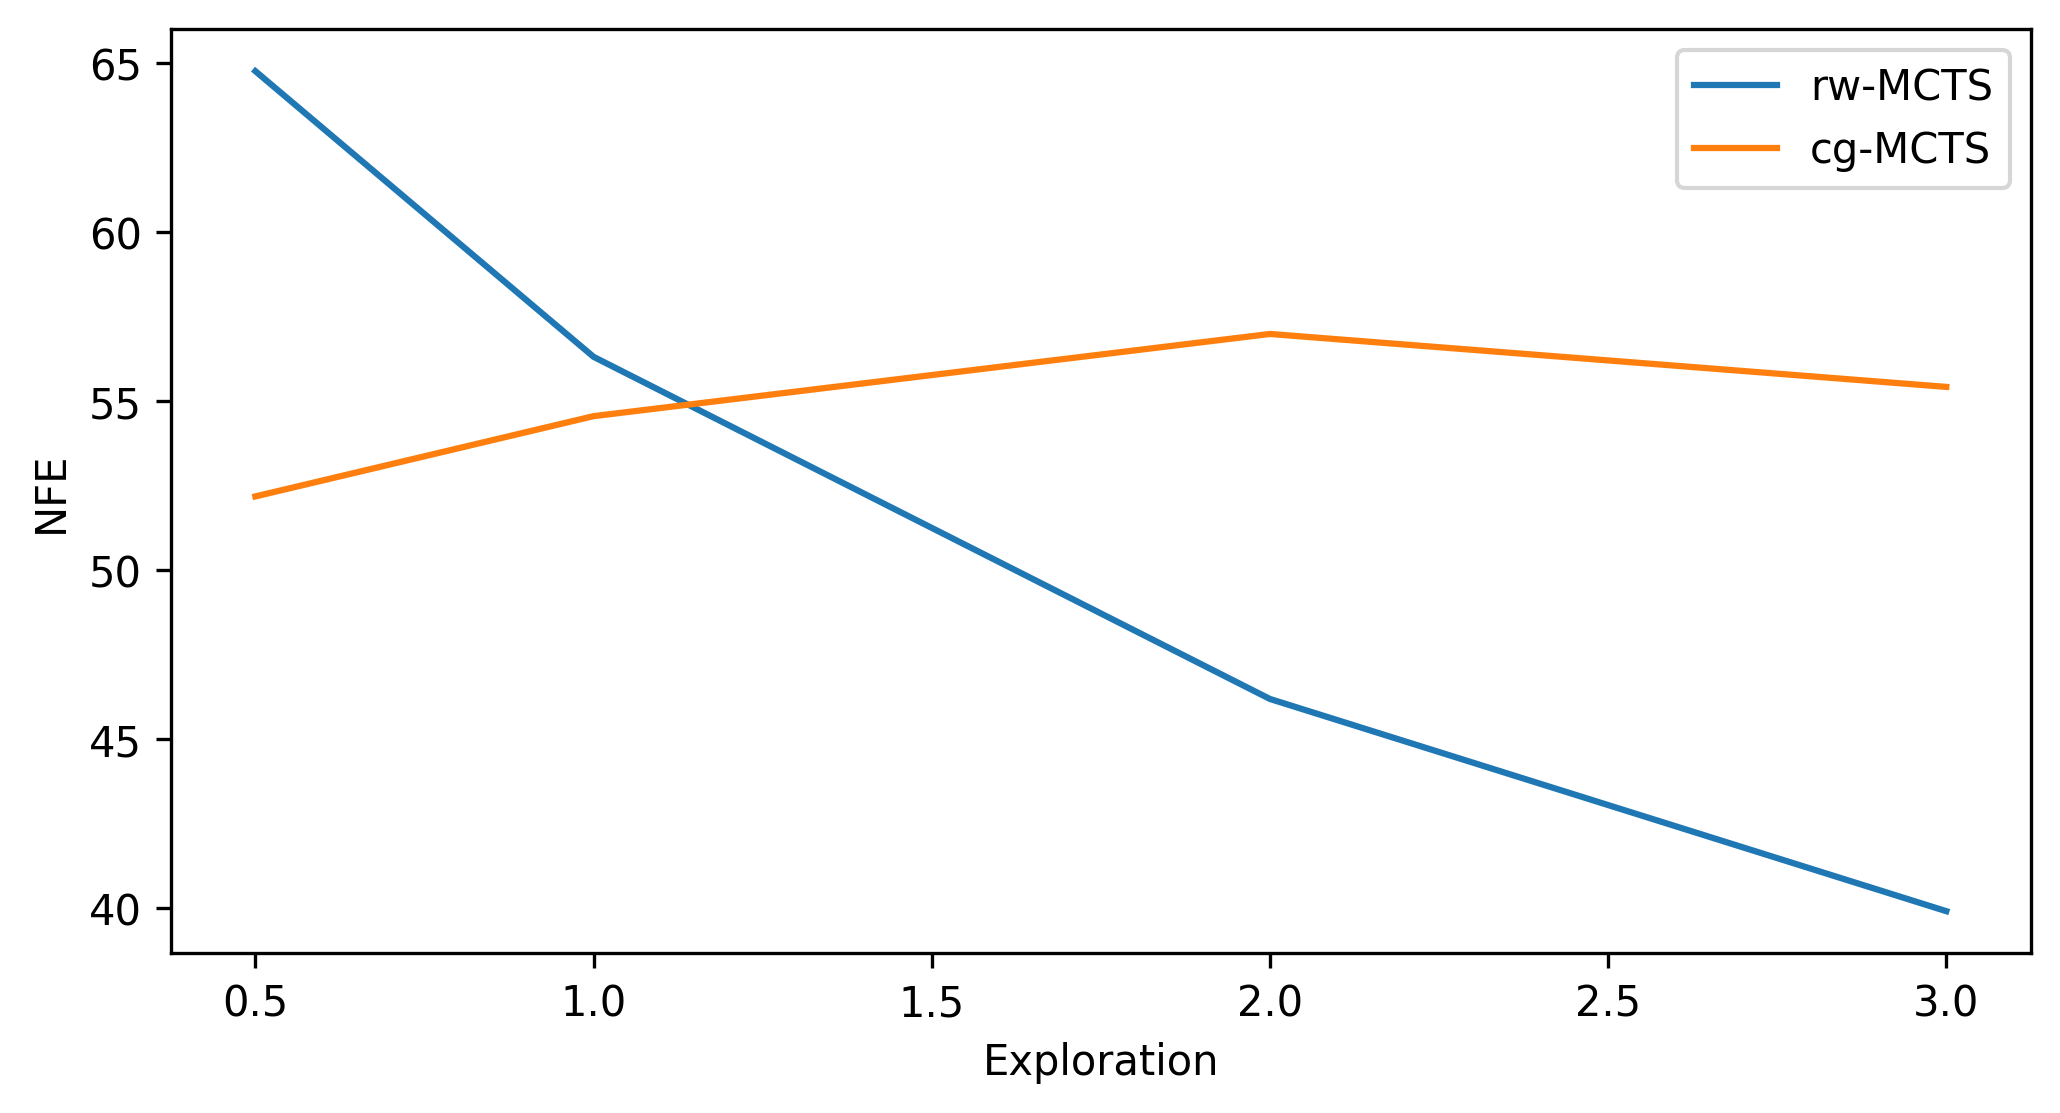

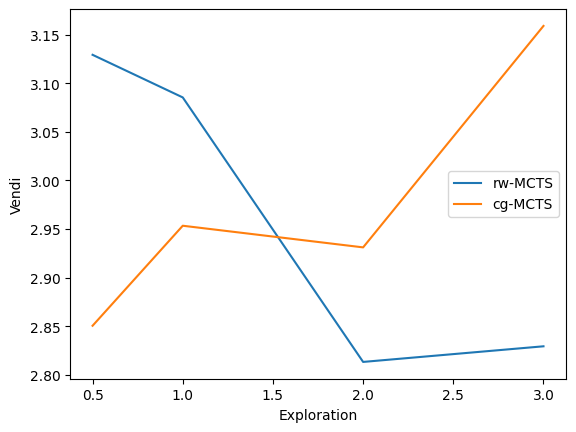

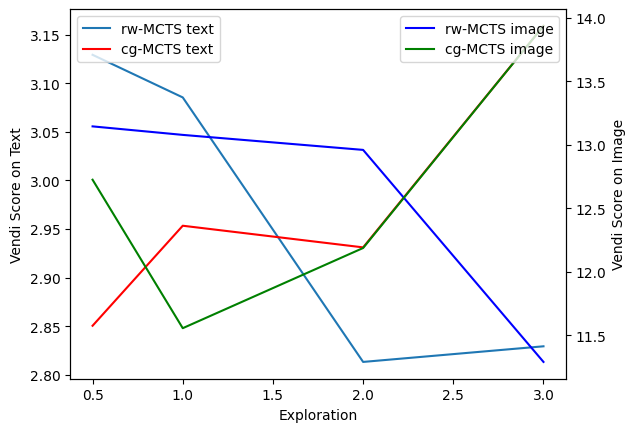

In [63]:
# exploration - nfe graph
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=300)
plt.plot(exploration, rw_mcts_nfe, label='rw-MCTS')
plt.plot(exploration, cg_mcts_nfe, label='cg-MCTS')
plt.xlabel('Exploration')
plt.ylabel('NFE')
plt.legend()
plt.show()
# exploration - vendi graph
fig, ax1 = plt.subplots()
plt.plot(exploration, rw_mcts_vendi, label='rw-MCTS')
plt.plot(exploration, cg_mcts_vendi, label='cg-MCTS')
plt.xlabel('Exploration')
plt.ylabel('Vendi')
plt.legend()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(exploration, rw_mcts_vendi, label='rw-MCTS text')
ax1.plot(exploration, cg_mcts_vendi, label='cg-MCTS text', color='r')
ax1.legend(loc='upper left')
ax2.plot(exploration, rw_mcts_vendi2, label='rw-MCTS image', color='b')
ax2.plot(exploration, cg_mcts_vendi2, label='cg-MCTS image', color='g')
ax2.legend(loc='upper right')
ax1.set_xlabel('Exploration')
ax1.set_ylabel('Vendi Score on Text')
ax2.set_ylabel('Vendi Score on Image')
plt.show()


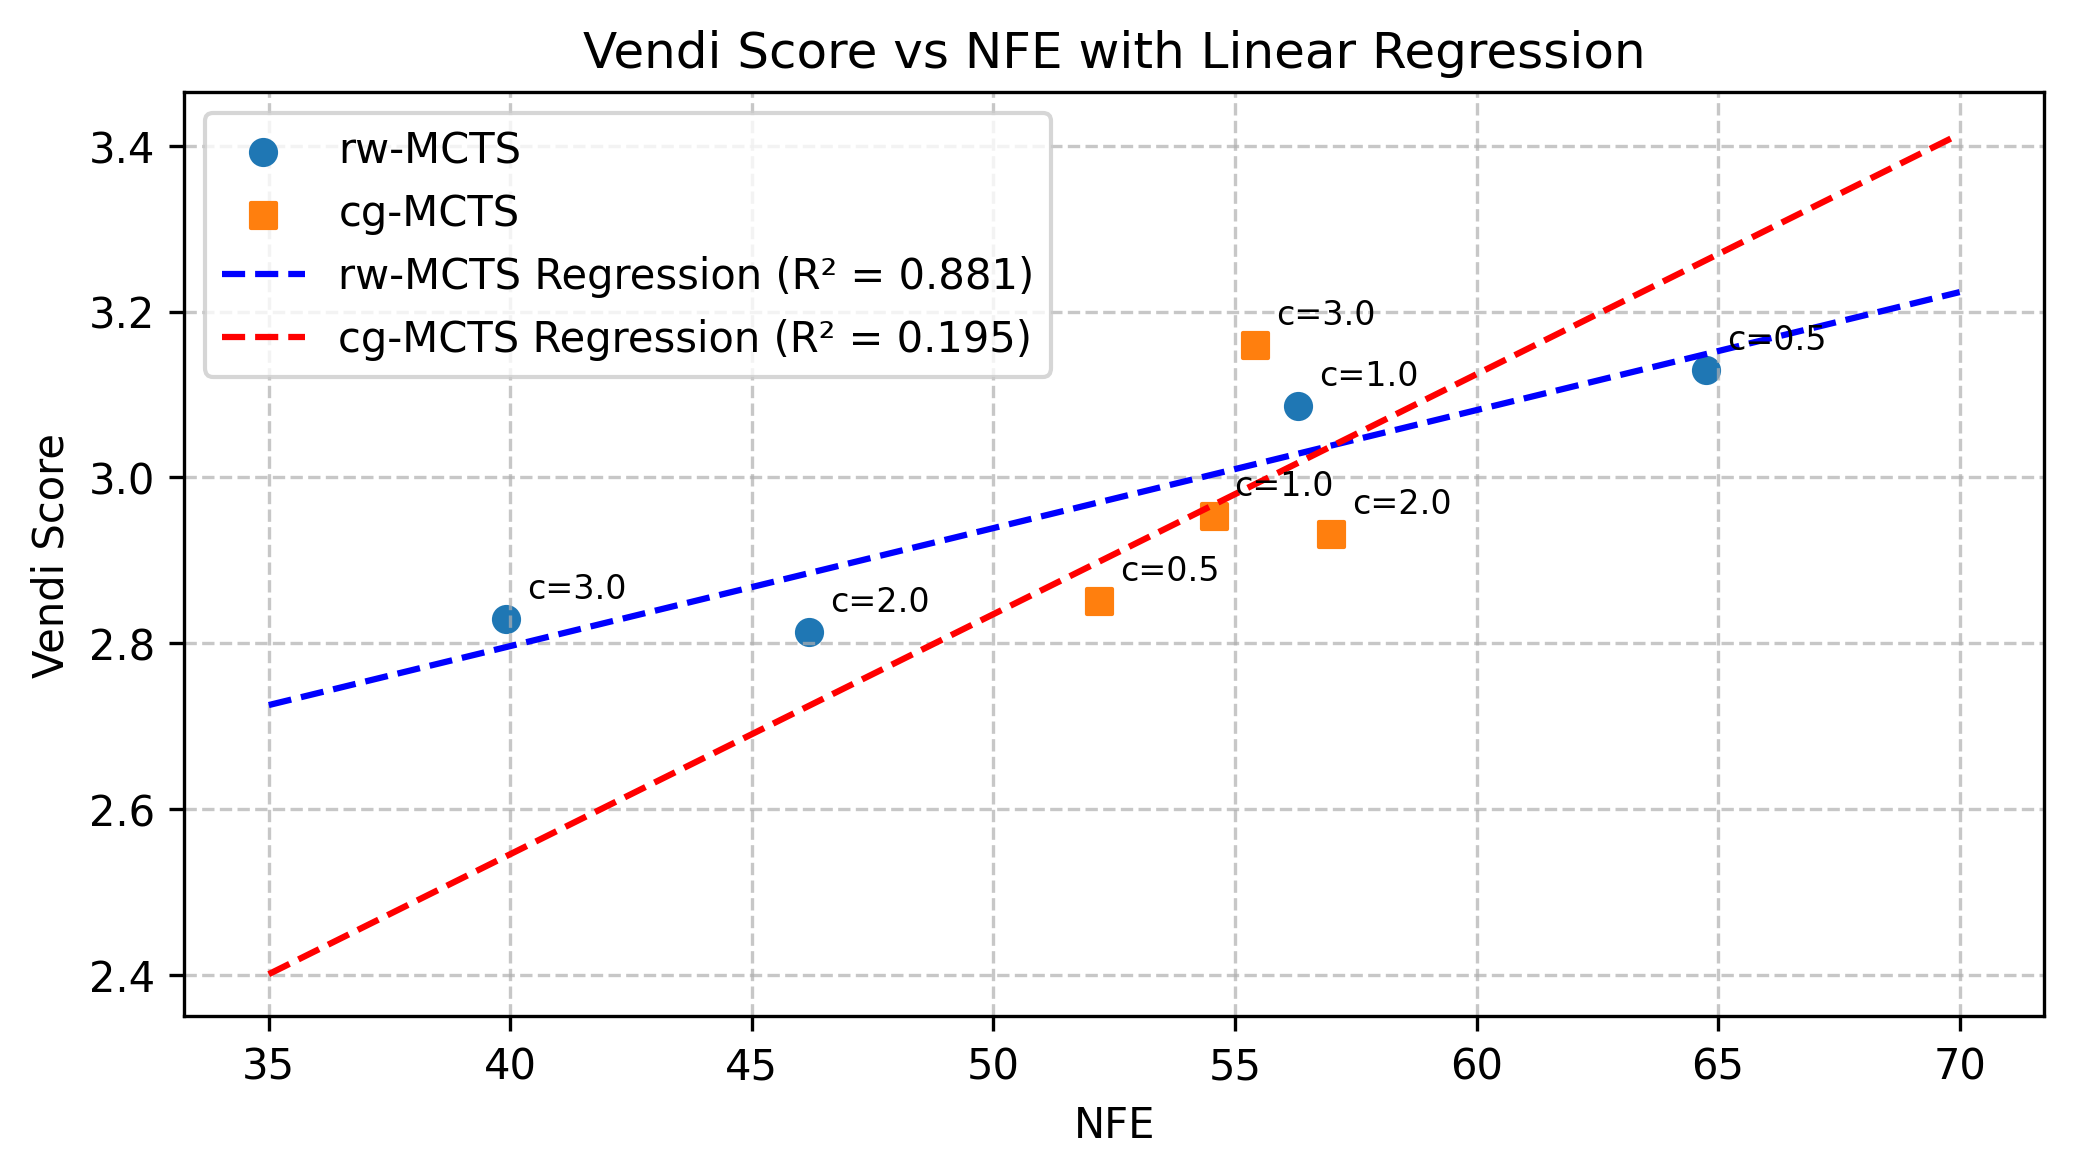

In [64]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
# Create scatter plots
plt.scatter(rw_mcts_nfe, rw_mcts_vendi, label='rw-MCTS', marker='o')
plt.scatter(cg_mcts_nfe, cg_mcts_vendi, label='cg-MCTS', marker='s')

# Calculate linear regression and R² for rw-MCTS
slope_rw, intercept_rw, r_value_rw, p_value_rw, std_err_rw = stats.linregress(rw_mcts_nfe, rw_mcts_vendi)
r_squared_rw = r_value_rw**2

# Calculate linear regression and R² for cg-MCTS
slope_cg, intercept_cg, r_value_cg, p_value_cg, std_err_cg = stats.linregress(cg_mcts_nfe, cg_mcts_vendi)
r_squared_cg = r_value_cg**2

# Create x values for regression lines
x_rw = np.linspace(35, 70, 100)
x_cg = np.linspace(35, 70, 100)

# Plot regression lines
plt.plot(x_rw, slope_rw * x_rw + intercept_rw, 'b--', 
         label=f'rw-MCTS Regression (R² = {r_squared_rw:.3f})')
plt.plot(x_cg, slope_cg * x_cg + intercept_cg, 'r--', 
         label=f'cg-MCTS Regression (R² = {r_squared_cg:.3f})')

# Add annotations for exploration values
for i, exp in enumerate(exploration):
    plt.annotate(f'c={exp}', 
                (rw_mcts_nfe[i], rw_mcts_vendi[i]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)
    plt.annotate(f'c={exp}', 
                (cg_mcts_nfe[i], cg_mcts_vendi[i]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

plt.xlabel('NFE')
plt.ylabel('Vendi Score')
plt.legend()
plt.title('Vendi Score vs NFE with Linear Regression')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

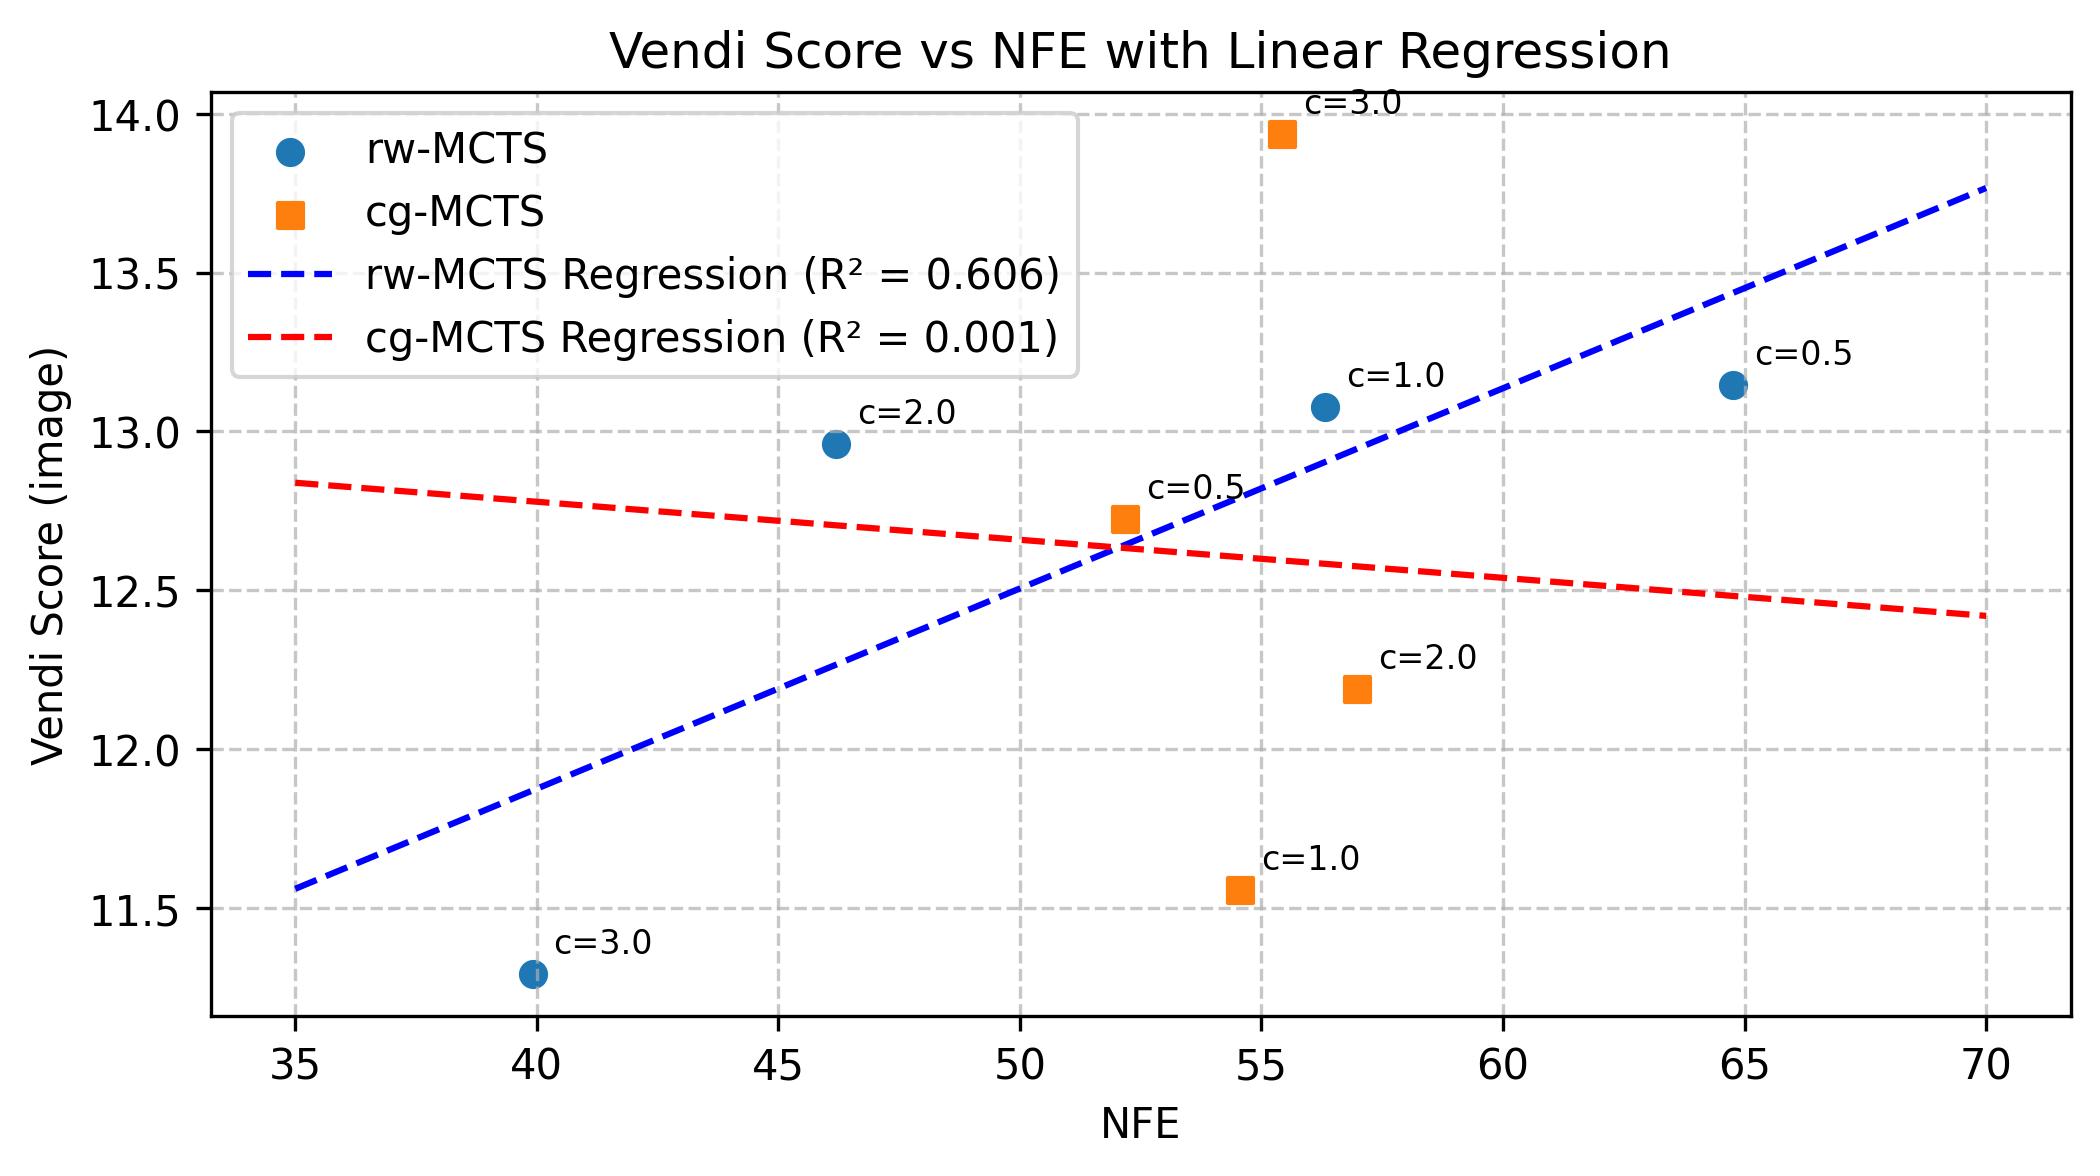

In [65]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
# Create scatter plots
plt.scatter(rw_mcts_nfe, rw_mcts_vendi2, label='rw-MCTS', marker='o')
plt.scatter(cg_mcts_nfe, cg_mcts_vendi2, label='cg-MCTS', marker='s')

# Calculate linear regression and R² for rw-MCTS
slope_rw, intercept_rw, r_value_rw, p_value_rw, std_err_rw = stats.linregress(rw_mcts_nfe, rw_mcts_vendi2)
r_squared_rw = r_value_rw**2

# Calculate linear regression and R² for cg-MCTS
slope_cg, intercept_cg, r_value_cg, p_value_cg, std_err_cg = stats.linregress(cg_mcts_nfe, cg_mcts_vendi2)
r_squared_cg = r_value_cg**2

# Create x values for regression lines
x_rw = np.linspace(35, 70, 100)
x_cg = np.linspace(35, 70, 100)

# Plot regression lines
plt.plot(x_rw, slope_rw * x_rw + intercept_rw, 'b--', 
         label=f'rw-MCTS Regression (R² = {r_squared_rw:.3f})')
plt.plot(x_cg, slope_cg * x_cg + intercept_cg, 'r--', 
         label=f'cg-MCTS Regression (R² = {r_squared_cg:.3f})')

# Add annotations for exploration values
for i, exp in enumerate(exploration):
    plt.annotate(f'c={exp}', 
                (rw_mcts_nfe[i], rw_mcts_vendi2[i]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)
    plt.annotate(f'c={exp}', 
                (cg_mcts_nfe[i], cg_mcts_vendi2[i]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

plt.xlabel('NFE')
plt.ylabel('Vendi Score (image)')
plt.legend()
plt.title('Vendi Score vs NFE with Linear Regression')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()